# Point72 Case Study - data analysis

## Company: Williams-Sonoma, Inc. (WSM)

- **author:** Antonio Foglia
- **sources:**
    - https://www.census.gov/retail/index.html#ecommerce
    - https://ir.williams-sonomainc.com/investor-information/financial-reports/default.aspx

## DATA GATHERING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import bs4

In [2]:
#import the data from excel
inventories_2021 = pd.read_excel('mrtsinv92-present.xlsx','2021',header=4,index_col=1)
inventories_2020 = pd.read_excel('mrtsinv92-present.xlsx','2020',header=4,index_col=1)
sales_2021 = pd.read_excel('mrtssales92-present.xlsx','2021',header=4,index_col=1)
sales_2020 = pd.read_excel('mrtssales92-present.xlsx','2020',header=4,index_col=1)

In [3]:
#extract relevant data for relevant quarters (highlighted in excel workbooks)
#relevant data is adjusted values for 'Furniture, home furn, electronics, and appliance stores'

#adjusted iventories
inventories_Q1_2021 = inventories_2021.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][1:4]
inventories_Q4_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][10:13]
inventories_Q3_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][7:10]
inventories_Q2_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][4:7]
inventories_Q1_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][1:4]

#adjusted invetories/sales ratio
inventoriessales_Q1_2021 = inventories_2021.loc['Furniture, home furn, electronics, and appliance stores'].iloc[3][1:4]
inventoriessales_Q4_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[3][10:13]
inventoriessales_Q3_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[3][7:10]
inventoriessales_Q2_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[3][4:7]
inventoriessales_Q1_2020 = inventories_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[3][1:4]

#adjusted sales
sales_Q1_2021 = sales_2021.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][1:4]
sales_Q4_2020 = sales_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][10:13]
sales_Q3_2020 = sales_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][7:10]
sales_Q2_2020 = sales_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][4:7]
sales_Q1_2020 = sales_2020.loc['Furniture, home furn, electronics, and appliance stores'].iloc[1][1:4]

In [4]:
#creating relevant lists
inventories = [sum(inventories_Q1_2020),sum(inventories_Q2_2020),sum(inventories_Q3_2020),sum(inventories_Q4_2020),sum(inventories_Q1_2021)]
sales = [sum(sales_Q1_2020),sum(sales_Q2_2020),sum(sales_Q3_2020),sum(sales_Q4_2020),sum(sales_Q1_2021)]
time = [i for i in range(len(inventories))]
time_labels = ['Q1 2020','Q2 2020','Q3 2020','Q4 2020','Q1 2021']

#calculate the ratios
inventoriessales = [i/j for i,j in zip(inventories,sales)]

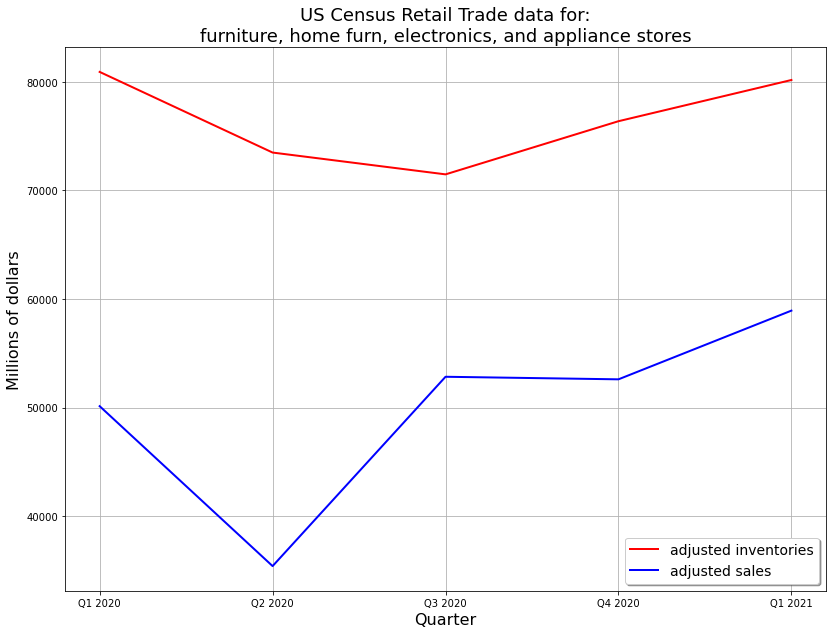

In [5]:
#plot for data visualization
fig = plt.figure(figsize=(30,10))
axes = fig.add_subplot(1,2,1)

axes.plot(time,inventories,'r',label='adjusted inventories', linewidth=2)
#axes.plot(time,inventoriessales,'r',label='inventories/sales ratio', linewidth=2)
axes.plot(time,sales,'b',label='adjusted sales', linewidth=2)

axes.set_xticks([0,1,2,3,4])
axes.set_xticklabels(time_labels)
axes.set_title('US Census Retail Trade data for:\nfurniture, home furn, electronics, and appliance stores',fontsize=18)
axes.legend(loc='best',shadow=True, fontsize=14)
axes.set_xlabel('Quarter',fontsize=16)
axes.set_ylabel('Millions of dollars',fontsize=16)
axes.grid()
plt.show()

In [6]:
# webscrape to collect 2020 historical data form WSM's earning releases

Q1 = 'https://ir.williams-sonomainc.com/investor-information/news-releases/news-release-details/2020/Williams-Sonoma-Inc-announces-strong-results-for-the-first-quarter-of-2020/'
Q2 = 'https://ir.williams-sonomainc.com/investor-information/news-releases/news-release-details/2020/Williams-Sonoma-Inc.-announces-second-quarter-2020-results/default.aspx'
Q3 = 'https://ir.williams-sonomainc.com/investor-information/news-releases/news-release-details/2020/Williams-Sonoma-Inc.-announces-third-quarter-2020-results/'
Q4 = 'https://ir.williams-sonomainc.com/investor-information/news-releases/news-release-details/2021/Williams-Sonoma-Inc.-announces-strong-fourth-quarter-and-fiscal-year-2020-results/default.aspx'

quarter_list=[Q1,Q2,Q3,Q4]

#key paramters to extract for 2020 Q1-Q4
net_revenues = []
gross_profit = []
operating_income = []
earnings_before_income_taxes = []
net_earnings  = []
EPS_basic = []

In [7]:
#extract Q1 data via webscraping
bs=bs4.BeautifulSoup(requests.get(Q1).content,'lxml')
tables=bs.find_all('table')
df=pd.read_html(str(tables[0]))[0]
df.drop([i for i in range (1,13) if i != 3], axis=1, inplace=True)
df.set_index(0,inplace=True)
net_revenues.append(float(df.loc['Net revenues']))
gross_profit.append(float(df.loc['Gross profit']))
operating_income.append(float(df.loc['Operating income']))
earnings_before_income_taxes.append(float(df.loc['Earnings before income taxes']))
net_earnings.append(float(df.loc['Net earnings']))
EPS_basic.append(float(df.loc['Basic'].iloc[0].item()[1:]))

In [8]:
#extract Q2 data via webscraping
bs=bs4.BeautifulSoup(requests.get(Q2).content,'lxml')
tables=bs.find_all('table')
df=pd.read_html(str(tables[0]))[0]
df.drop([i for i in range (1,22) if i != 2], axis=1, inplace=True)
df.set_index(0,inplace=True)
net_revenues.append(float(df.loc['Net revenues']))
gross_profit.append(float(df.loc['Gross profit']))
operating_income.append(float(df.loc['Operating income']))
earnings_before_income_taxes.append(float(df.loc['Earnings before income taxes']))
net_earnings.append(float(df.loc['Net earnings']))
EPS_basic.append(float(df.loc['Basic'].iloc[0].item()[1:]))

In [9]:
#extract Q3 data via webscraping
bs=bs4.BeautifulSoup(requests.get(Q3).content,'lxml')
tables=bs.find_all('table')
df=pd.read_html(str(tables[0]))[0]
df.drop([i for i in range (1,22) if i != 2], axis=1, inplace=True)
df.set_index(0,inplace=True)
net_revenues.append(float(df.loc['Net revenues']))
gross_profit.append(float(df.loc['Gross profit']))
operating_income.append(float(df.loc['Operating income']))
earnings_before_income_taxes.append(float(df.loc['Earnings before income taxes']))
net_earnings.append(float(df.loc['Net earnings']))
EPS_basic.append(float(df.loc['Basic'].iloc[0].item()[1:]))

In [10]:
#extract Q4 data via webscraping
bs=bs4.BeautifulSoup(requests.get(Q4).content,'lxml')
tables=bs.find_all('table')
df=pd.read_html(str(tables[0]))[0]
df.drop([i for i in range (1,13) if i != 2], axis=1, inplace=True)
df.set_index(0,inplace=True)
net_revenues.append(float(df.loc['Net revenues'].item()[1:].replace(',', '')))
gross_profit.append(float(df.loc['Gross profit']))
operating_income.append(float(df.loc['Operating income']))
earnings_before_income_taxes.append(float(df.loc['Earnings before income taxes']))
net_earnings.append(float(df.loc['Net earnings'].item()[1:].replace(',', '')))
EPS_basic.append(float(df.loc['Basic'].iloc[0].item()[1:]))

In [11]:
#make all units in millions instead of in thoudands

net_revenues_pm = [i * 0.001 for i in net_revenues]
gross_profit_pm = [i * 0.001 for i in gross_profit]
operating_income_pm = [i * 0.001 for i in operating_income]
earnings_before_income_taxes_pm = [i * 0.001 for i in earnings_before_income_taxes]
net_earnings_pm = [i * 0.001 for i in net_earnings]

In [12]:
print(net_revenues_pm,
gross_profit_pm,
operating_income_pm,
earnings_before_income_taxes_pm,
net_earnings_pm,
EPS_basic)

[1235.203, 1490.777, 1764.536, 2292.6730000000002] [414.26, 551.202, 705.583, 965.224] [48.645, 185.361, 274.604, 402.087] [46.486000000000004, 178.897, 269.26, 399.82300000000004] [35.423, 134.564, 201.772, 308.955] [0.46, 1.73, 2.6, 4.04]


## DATA ANALYSIS

In [13]:
predictions_pm = {'net revenues' : None,
'gross profit' : None,
'operating income': None,
'earnings before income taxes': None,
'net earnings': None}

### REVENUE

#### 1. Using Sales

In [14]:
#historical data ratio of total sales to WSM revenue
ratio_sales = []
for total, wsm in zip( sales[:-1],net_revenues_pm):
    ratio_sales.append(wsm/total)

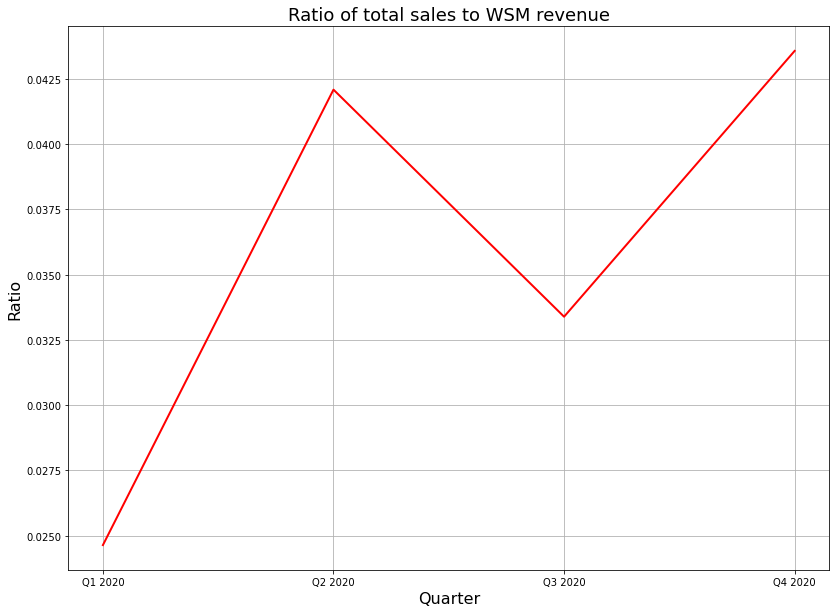

In [15]:
#plot the ratio of total sales to WSM revenue
#Notice Q1 2020 not affected by covid WSM had smaller market share 
time_2020 = time[:-1]
time_labels_2020 = time_labels[:-1]
fig = plt.figure(figsize=(30,10))
axes = fig.add_subplot(1,2,1)
axes.plot(time_2020,ratio_sales,'r', linewidth=2)
axes.set_xticks(time_2020)
axes.set_xticklabels(time_labels_2020)
axes.set_title('Ratio of total sales to WSM revenue',fontsize=18)
axes.set_xlabel('Quarter',fontsize=16)
axes.set_ylabel('Ratio',fontsize=16)
axes.grid()
plt.show()

In [16]:
#predict revenues based on Q2-Q4 2020 sales ratio
REVENUES_Q1_2021_sales = sales[-1] * (sum(ratio_sales[1:])/len(ratio_sales[1:]))

#### 2. Using Inventories

In [17]:
#historical data ratio of total inventory to WSM revenue
ratio_inventories = []
for total, wsm in zip( inventories[:-1],net_revenues_pm):
    ratio_inventories.append(wsm/total)

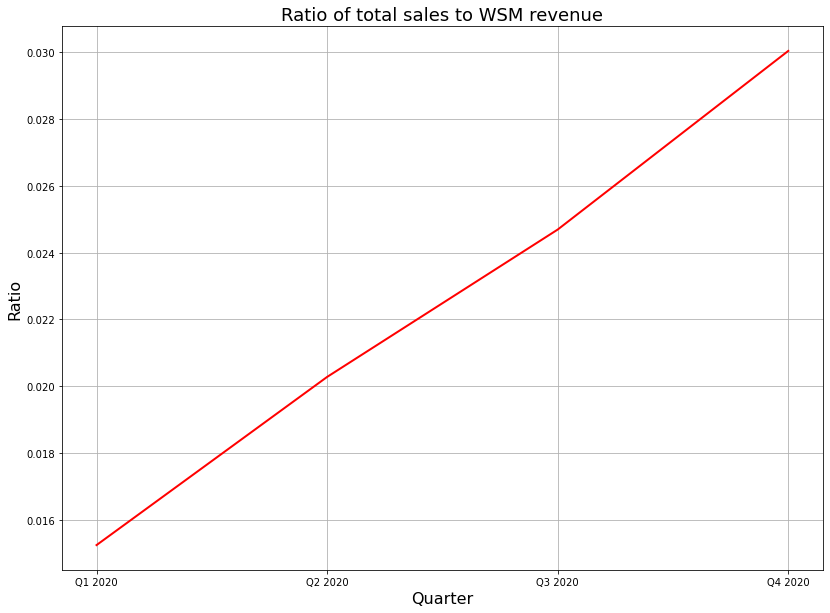

In [18]:
#plot the ratio of total sales to WSM revenue
#Notice Q1 2020 not affected by covid WSM had smaller market share 
time_2020 = time[:-1]
time_labels_2020 = time_labels[:-1]
fig = plt.figure(figsize=(30,10))
axes = fig.add_subplot(1,2,1)
axes.plot(time_2020,ratio_inventories,'r', linewidth=2)
axes.set_xticks(time_2020)
axes.set_xticklabels(time_labels_2020)
axes.set_title('Ratio of total sales to WSM revenue',fontsize=18)
axes.set_xlabel('Quarter',fontsize=16)
axes.set_ylabel('Ratio',fontsize=16)
axes.grid()
plt.show()

In [19]:
#predict revenues based on Q1-Q4 2020 inventory ratio trendline
z = np.polyfit(time_2020,ratio_inventories,1)
REVENUES_Q1_2021_inventories = inventories[-1] * ( 4 * z[0] + z[1])

#### 3. Together

In [20]:
print(REVENUES_Q1_2021_inventories)
print(REVENUES_Q1_2021_sales)
REVENUES_Q1_2021_average = (REVENUES_Q1_2021_inventories + REVENUES_Q1_2021_sales)/2
predictions_pm['net revenues'] = REVENUES_Q1_2021_average

2784.146885703299
2338.986470957784


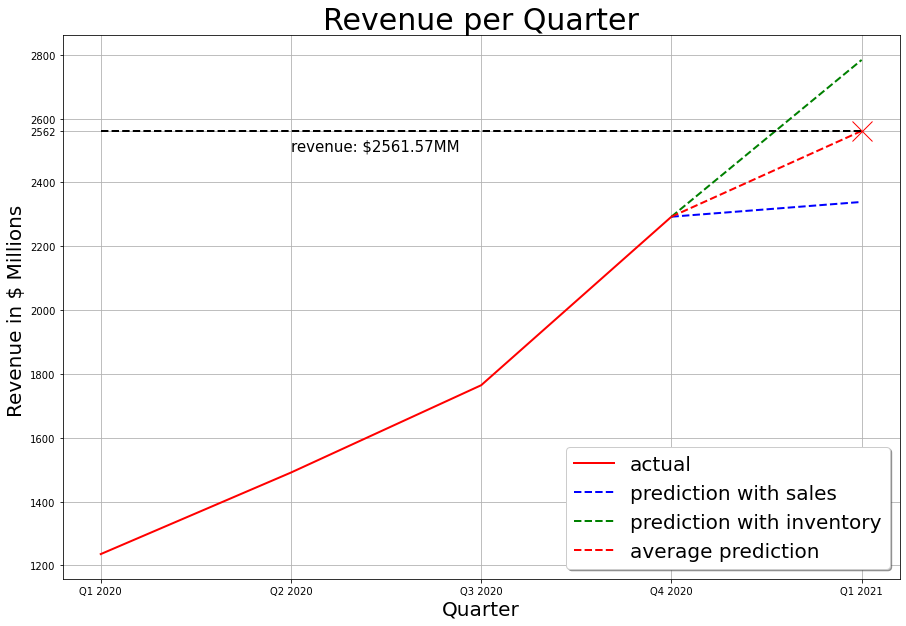

In [21]:
time_2020 = time[:-1]
time_labels_2020 = time_labels[:-1]
fig = plt.figure(figsize=(15,10))
axes = fig.add_subplot()

axes.plot(time_2020,net_revenues_pm,'r',label='actual', linewidth=2)
axes.plot(time[-2:],[net_revenues_pm[-1],REVENUES_Q1_2021_sales],'b--',label='prediction with sales', linewidth=2)
axes.plot(time[-2:],[net_revenues_pm[-1],REVENUES_Q1_2021_inventories],'g--',label='prediction with inventory', linewidth=2)
axes.plot(time[-2:],[net_revenues_pm[-1],REVENUES_Q1_2021_average],'r--',label='average prediction', linewidth=2)
axes.plot(time,[REVENUES_Q1_2021_average for i in range(len(time))],'k--', linewidth=2)

axes.plot(4, REVENUES_Q1_2021_average,'rx', markersize=20)
axes.text(1, REVENUES_Q1_2021_average-60, 
          'revenue: ${}MM'.format(round(REVENUES_Q1_2021_average,2)),
          color="k",
          fontsize=15)

axes.set_yticks(np.append(axes.get_yticks(),REVENUES_Q1_2021_average) )
axes.set_xticks(time)
axes.set_xticklabels(time_labels)
axes.legend(loc='best',shadow=True, fontsize=20)
axes.set_title('Revenue per Quarter',fontsize=30)
axes.set_xlabel('Quarter',fontsize=20)
axes.set_ylabel('Revenue in $ Millions ',fontsize=20)
axes.grid()
axes.plot()
plt.savefig('figures/Revenue per Quarter.png')

### OTHER KEY DATA

In [22]:
#for all other data, I will make trendlines to predict Q1 2021 values
other_data = [gross_profit_pm,
operating_income_pm,
earnings_before_income_taxes_pm,
net_earnings_pm]

colors = ['r','b','g','y']
names = ['gross profit',
'operating income',
'earnings before income taxes',
'net earnings']

In [23]:
def prediction_with_trendline(data,name=None,color=None,plot=False):
    
    z = np.polyfit(time_2020,data,1)
    pred = time[-1] * z[0] + z[1]
    
    if plot:
        fig = plt.figure(figsize=(10,5))
        axes = fig.add_subplot()



        axes.plot(time_2020,data,color,label=name, linewidth=2)
        axes.plot(time[-2:],[data[-1],pred],'{}--'.format(color),label='{} prediction'.format(name), linewidth=2)

        axes.set_xticks(time)
        axes.set_xticklabels(time_labels)
        axes.legend(loc='best',shadow=True, fontsize=14)
        axes.set_title('{} per quarter'.format(name),fontsize=18)
        axes.set_xlabel('Quarter',fontsize=16)
        axes.set_ylabel('$ Millions',fontsize=16)
        axes.grid()
        axes.plot()
        plt.savefig('figures/{}.png'.format(axes.get_title()))
                                          
    return pred

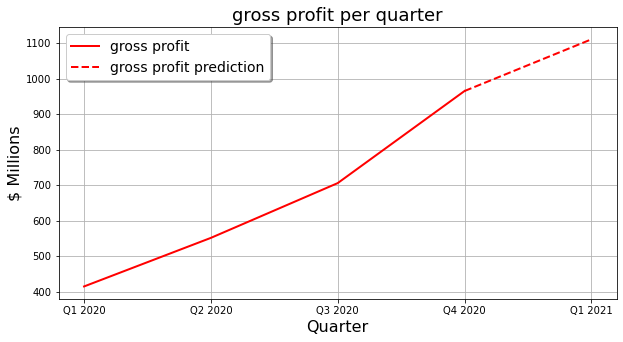

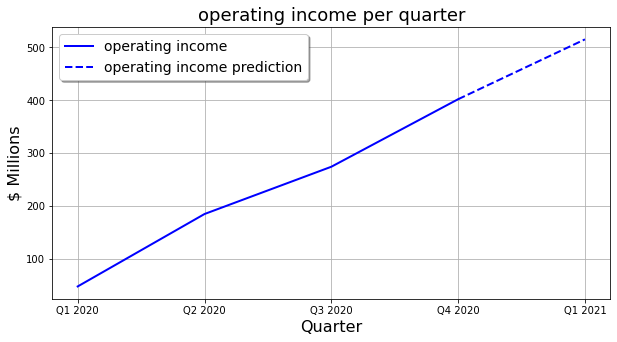

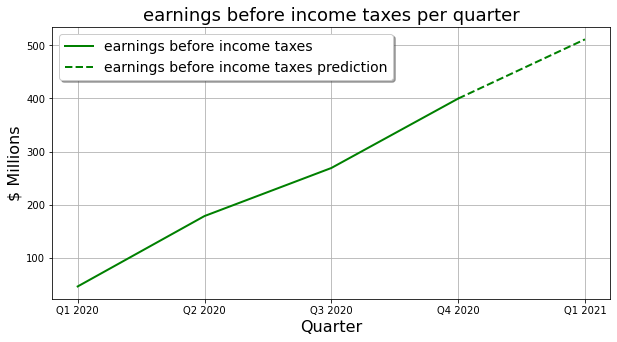

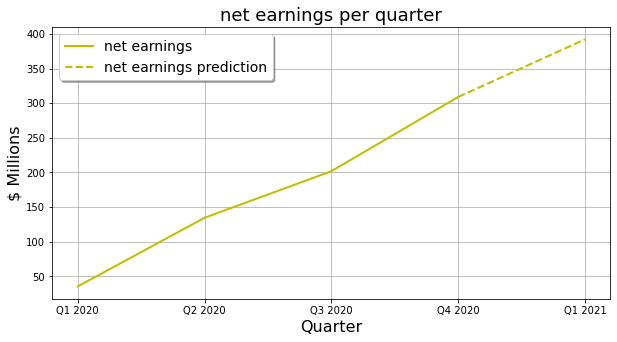

In [24]:
for data, color, name in zip(other_data,colors,names):
    predictions_pm[name] = prediction_with_trendline(data,name=name,color=color,plot=True)

## CONCLUSIONS

In [25]:
# converting back to thousands
final_predictions = {}
print(predictions_pm)
for key in predictions_pm:
    final_predictions[key] = predictions_pm[key]*1000

{'net revenues': 2561.5666783305414, 'gross profit': 1110.8854999999999, 'operating income': 515.0665000000001, 'earnings before income taxes': 511.21000000000004, 'net earnings': 392.1295}


In [26]:
#finally for EPS (basic)
final_predictions['EPS (basic)'] = prediction_with_trendline(EPS_basic)

In [27]:
print(final_predictions)

{'net revenues': 2561566.6783305416, 'gross profit': 1110885.4999999998, 'operating income': 515066.5000000001, 'earnings before income taxes': 511210.00000000006, 'net earnings': 392129.5, 'EPS (basic)': 5.11}
